### Exercise 2.1
Plot $z=\Phi^{-1}\left(F_{v}(t)\right)$ versus  $t$  for $-4 \leq t \leq 4,$ for degrees of  freedom $ v=25, 50$, and $100$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
t = np.linspace(-4, 4, 100)
vs = [1, 25, 50, 100]

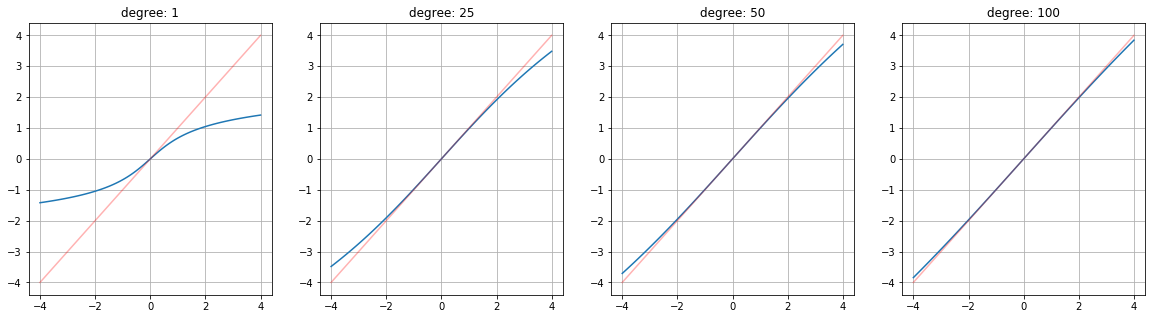

In [3]:
fig, axs = plt.subplots(1, len(vs), figsize = (20, 5))
for i ,v in enumerate(vs):
    F_v = stats.t.cdf(t, df = v)
    z = stats.norm.ppf(F_v)
    axs[i].plot(t, z)
    axs[i].plot(t, t, 'r', alpha = 0.3)
    axs[i].set_title(f'degree: {v}')
    axs[i].grid()

### Exercise 2.2
Show that

$$
{E_{f}\{\phi(z) | z \in \mathcal{Z}\}=\phi(\mathcal{Z})}
$$

where $E_{f}$ indicates conditional expectation with respect to the marginal density $f(z)$.

In other words, $\operatorname{Fdr}(\mathcal{Z})$ is the conditional expectation of  $\operatorname{fdr}(z)$ given  $z \in \mathcal{Z}$ .

### Solution
To show that ${E_{f}\{\phi(z) | z \in \mathcal{Z}\}=\phi(\mathcal{Z})}$, it suffices to prove that

- $(1)\  \phi(\mathcal{Z}) \in \sigma({z \in \mathcal Z}): trivial$

- $(2)\ E_{f}[\phi(z)\cdot I_A] = E_Z[\phi(\mathcal{Z})\cdot I_A]$, for any $ A\in \sigma(z\in \mathcal{Z}):$

\begin{align}
E_f[{\phi(z)\cdot I_A}]
& =  \int_{\mathbb{R}} \frac{\pi_0\cdot f_0(z)\cdot I_A }{f(z)}\cdot f(z)\  dz\\ 
& = \int_{\mathbb{R}} \pi_0 \cdot f_0(z)\cdot I_A \ dz                   \\
& = \pi_0 \cdot F_0(A); \\
\\
E_Z[{\phi(Z)}\cdot I_A] 
&= \frac{\pi_0 \cdot F_0(Z)\cdot I_A }{F(Z)} \cdot F(Z)\\
& = \pi_0 \cdot F_0(Z) \cdot I_A\\
& = \pi_0 \cdot F_0(A) \quad \text{since  } A \in \sigma(z \in \mathcal{Z}).
\end{align}




### Exercise 2.3
Suppose
$$
F_1(z) = F_0(z)^\gamma\quad [\gamma <1]
$$

*(often called Lehmann alternatives).* Show that 

$$
\log \left\{\frac{\operatorname{fdr}(z)}{1-\operatorname{fdr}(z)}\right\}=\log \left\{\frac{\operatorname{Fdr}(z)}{1-\operatorname{Fdr}(z)}\right\}+\log \left(\frac{1}{\gamma}\right) 
$$

and that

$$
\operatorname{fdr}(z) \doteq \operatorname{Fdr}(z)/\gamma
$$

for small values of $\operatorname{Fdr}(z)$.




### Solution


\begin{align}
F_1(z) &= F_0(z)^\gamma\quad [\gamma <1]\\
f_1(z) &= \gamma \cdot F_0(z)^{\gamma-1} \cdot f_0(z)\\ 
\\
\log \left\{\frac{\operatorname{fdr}(z)}{1-\operatorname{fdr}(z)}\right\}
&= \log \left\{ \frac{\pi_0 \cdot f_0(z)}{f(z)}  \cdot \frac{f(z)}{\pi_1 \cdot f_1(z)} \right\} \\
&= \log \left\{ \frac{\pi_0 \cdot f_0(z)} {\pi_1 \cdot f_1(z)} \right\} \\
&= \log \left\{ \frac{\pi_0}{\pi_1}  \cdot F_0(z)^{1-\gamma} \right\} + \log\left\{{\frac{1}{\gamma}}\right\}\\
\\
\log \left\{\frac{\operatorname{Fdr}(z)}{1-\operatorname{Fdr}(z)}\right\} 
&= \log \left\{\frac{\pi_0 \cdot F_0(z)}{\pi_1 \cdot F_1(z)}\right\}  \\
&= \log \left\{\frac{\pi_0}{\pi_1}\cdot F_0(z)^{1-\gamma} \right\}
\end{align}



For small values of $\operatorname{Fdr}(z)$:

\begin{align}
\operatorname{Fdr}(z) 
&= \frac{\pi_0 F_0}{\pi_0 F_0 + \pi_1 F_1} 
= \frac{\pi_0 F_0}{\pi_0 F_0 + \pi_1 F_0^\gamma} 
= \frac{\pi_0 }{\pi_0 + \pi_1 F_0^{\gamma-1}}\\
\\
\operatorname{fdr}(z) 
&= \frac{\pi_0 f_0}{\pi_0 f_0 + \pi_1 f_1} 
= \frac{\pi_0 f_0}{\pi_0 f_0 + \pi_1 \gamma F_0^{\gamma -1 } f_0} 
= \frac{\pi_0}{\pi_0 + \pi_1 \gamma F_0^{\gamma -1 }}\\
\\
\operatorname{fdr}(z)^{-1}
&= \frac{\pi_0 + \pi_1 \gamma F_0^{\gamma -1 }}{\pi_0} 
= 1+ \gamma\cdot\frac{\pi_1 F_0^{\gamma -1 }}{\pi_0} 
= 1+ \gamma\cdot (\operatorname{Fdr}(z)^{-1}-1)\\
\\
\lim\limits_{\operatorname{Fdr} \to 0} \frac{\operatorname{Fdr}}{\operatorname{fdr}}
&= \lim\limits_{x \to 0 } \ [{1+ \gamma \cdot (x^{-1} -1)] \cdot x})\\
&= \lim\limits_{x \to 0 } \ [ \gamma (1-x)] = \gamma
\end{align}



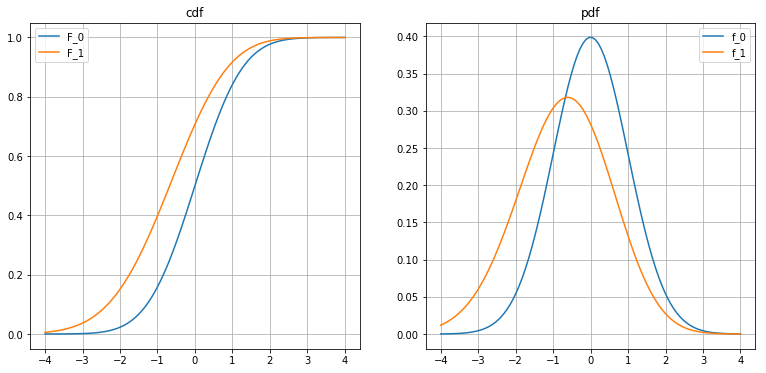

In [4]:
# some visulization of Lehmann alternatives
t = np.linspace(-4, 4, 100) 
F_0 = stats.norm.cdf(t)
gamma = 0.5
F_1 = F_0**gamma 

f_0 = stats.norm.pdf(t)
f_1 = gamma* F_0**(gamma-1) * f_0

fig, ax = plt.subplots(1,2, figsize = (13, 6))
# plot of cdf 
ax[0].plot(t, F_0, label = 'F_0')
ax[0].plot(t, F_1, label = 'F_1')
ax[0].legend()
ax[0].set_title('cdf')
ax[0].grid()
#plot of pdf 
ax[1].plot(t, f_0, label = 'f_0')
ax[1].plot(t, f_1, label = 'f_1')
ax[1].legend()
ax[1].set_title('pdf')
ax[1].grid()


### Exercise  2.4 

We would usually expect $f_{1}(z)$, the non-null density in (2.7), to have heavier tails than $f_{0}(z)$.

Why does this suggest, at least qualitatively, the shape of the curve shown in Figure 2.2 ?

### Answer
If $f_1(z)$ has a heavier tails, the increase of Fdr at the extreme value mostly comes from the $F_1(z)$.

Hence as $F(z)$ get increased, $\pi_0F_0(z)$ almost does not change.

Text(0,0.5,'numerator pi_0* F_0(z)')

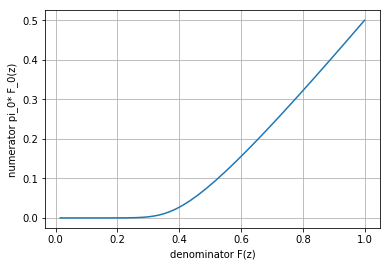

In [5]:
#Visualization of figure 2.2
t = np.linspace(-8, 8, 100) 
F_0 = stats.norm.cdf(t)
gamma = 0.1
F_1 = F_0**gamma 

pi_0 = 0.5
pi_1 = 1 - pi_0
F_z = pi_0* F_0 + pi_1 * F_1

plt.plot(F_z, pi_0*F_0)
plt.grid()
plt.xlabel('denominator F(z)')
plt.ylabel('numerator pi_0* F_0(z)')

In [6]:
# Visualization when f_1 have another direction tail  
t = np.linspace(-8, 8, 100)
dt = t[1] - t[0]

F_0 = stats.norm.cdf(t)
gamma = 0.5
F_1 = F_0**gamma 
F_0 = F_0[25:100]
F_1 = F_1[:75]
t = t[25:100]

f_0 = np.diff(F_0)/dt
f_1 = np.diff(F_1)/dt

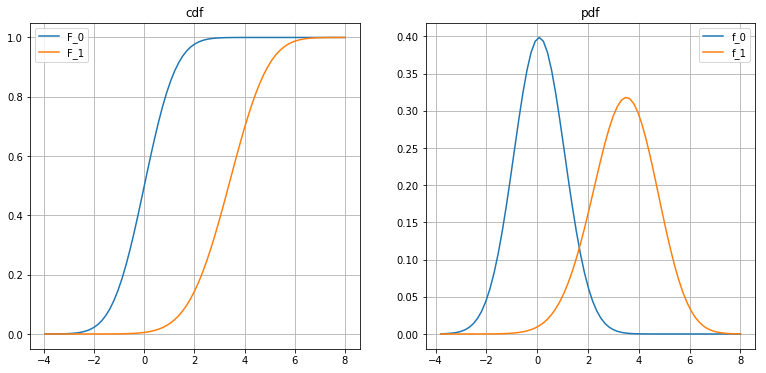

In [7]:
fig, ax = plt.subplots(1,2, figsize = (13, 6))
# plot the distribution of f_0 and f_1
# plot of cdf 
ax[0].plot(t, F_0, label = 'F_0')
ax[0].plot(t, F_1, label = 'F_1')
ax[0].legend()
ax[0].set_title('cdf')
ax[0].grid()
#plot of pdf 
ax[1].plot(t[1:], f_0, label = 'f_0')
ax[1].plot(t[1:], f_1, label = 'f_1')
ax[1].legend()
ax[1].set_title('pdf')
ax[1].grid()

Text(0,0.5,'numerator pi_0* F_0(z)')

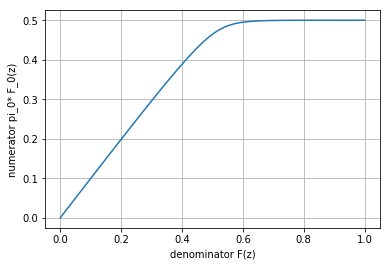

In [9]:
#figure 2.2 in other direction heavy tail
pi_0 = 0.5
pi_1 = 1 - pi_0
F_z = pi_0* F_0 + pi_1 * F_1

plt.plot(F_z, pi_0*F_0)
plt.grid()
plt.xlabel('denominator F(z)')
plt.ylabel('numerator pi_0* F_0(z)')

### Exercise 2.5 
Apply Jensen's inequality again to complete the proof (of lemma 2.1).

#### Lemma 2.1 
Suppose $e_0(\mathcal{Z})$ as defined at (2.23) is the same as the conditional expectation of $ N_0(\mathcal{Z})$ given $N_1(\mathcal{Z})$.
Then the conditional expectations of $\operatorname{Fdr}(\mathcal{Z})$ and $\operatorname{Fdp}(\mathcal{Z})$ given $N_1(\mathcal{Z})$ satisfy 


$$ E \left\{ \overline{\operatorname{Fdr}}(\mathcal{Z}) | N_{1}(\mathcal{\mathcal{Z}}) \right\} \geq \phi_{1}(\mathcal{\mathcal{Z}}) \geq E\left\{\operatorname{Fdp}(\mathcal{Z}) | N_{1}(\mathcal{Z})\right\}, $$
where
$$\phi_{1}(\mathcal{Z})=\frac{e_{0}(\mathcal{Z})}{e_{0}(\mathcal{Z})+N_{1}(\mathcal{Z})}. $$

### Solution
Trivial for $t/(t+ N_1(\mathcal{Z}))$ 's concavity when $t\ge 0$. 

### Exercise 2.6 

Show that $E\{\min(\overline{\operatorname{Fdr}}(\mathcal{Z}), 2)\} \ge \phi(\mathcal{Z})$.


Hint: Draw the tangent line to the curve $(N_+(\mathcal{Z})$,$\overline{\operatorname{Fdr}}(\mathcal{Z}))$ passing through the point $(e_+(\mathcal{Z}), \phi(\mathcal{Z}))$.


### Solution
$$\overline{\operatorname{Fdr}}(\mathcal{Z}) = \frac{e_0}{N_+}$$

The point $(e_+(\mathcal{Z}), \phi(\mathcal{Z}))$ is located on the at the curve $(N_+(\mathcal{Z}),\overline{\operatorname{Fdr}}(\mathcal{Z}))$, and the tangent line of the curve is 

$$y = - \frac{e_0}{N_+^2}(x - 2 N_+) .$$

The tangent line passing through the point $(e_+(\mathcal{Z}), \phi(\mathcal{Z}))$ is

$$y = - \frac{e_0}{e_+^2}(x - 2 e_+) = 2\phi - \frac{e_0}{e_+^2}x,$$

Consider function
$$
g(x) = 
\left\{ 
    \begin{array}{ll}
     2\phi - e_0\cdot x / e_+^2  & \textrm{if $0< x< e_+$}\\
     e_0/x              & \textrm{$x \ge e_+$}\\
    \end{array} 
\right.
$$

Then the function $g(x)$ is convex and
$$E\{\min(\overline{\operatorname{Fdr}}(\mathcal{Z}), 2)\} \ge E\{g(N_+(\mathcal{Z})) \} \ge g(E\{N_+(\mathcal{Z})\})\ge \phi(\mathcal{Z})$$. 




### Exercise 2.7 
Prove lemma 2.4.

#### Lemma 2.4 
Under the Poisson-independence assumptions (2.36), (2.40),

$$E\{\widetilde{\operatorname{Fdr}}(\mathcal{Z})\}=E\{\mathrm{Fdp}(\mathcal{Z})\}=\phi(\mathcal{Z}) \cdot\left[1-\exp \left(-e_{+}(\mathcal{Z})\right)\right]$$

### Solution 

$$\widetilde{\mathrm{Fdr}}(\mathcal{Z})=e_{0}(\mathcal{Z}) /\left(N_{+}(\mathcal{Z})+1\right).$$

By the assumption of Poisson-independence

$$N_+{(\mathcal{Z})}\sim Poi(\eta F(\mathcal{Z})).$$

Therefore

\begin{align}
E\{\widetilde{\mathrm{Fdr}}(\mathcal{Z})\}
&=E\{e_{0}(\mathcal{Z}) /\left(N_{+}(\mathcal{Z})+1\right)\}\\
&=e_{0}(\mathcal{Z})\cdot \sum_{k=0}^{\infty} \frac{1}{k+1} \cdot \frac{\lambda^k}{k!} e^{-\lambda} ,
\quad \lambda =\eta F(\mathcal{Z}) = e_+{\mathcal{Z}} \\
&=e_{0}(\mathcal{Z})\cdot \sum_{k=0}^{\infty} \frac{\lambda^k}{(k+1)!} e^{-\lambda}\\
&=e_{0}(\mathcal{Z})\cdot (1 - e^{-\lambda})/\lambda\\
&=\phi(\mathcal{Z}) \cdot\left[1-\exp \left(-e_{+}(\mathcal{Z})\right)\right].
\end{align}